In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns 
import matplotlib.pyplot as plt


In [ ]:
## Step - 1 - Introduction -> Give a detailed data description and objective

In [39]:
data = pd.read_excel(r"C:\Users\Sravanthi\Downloads\data.xlsx")

In [40]:
data

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [41]:
df = data.copy()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [43]:
## Step - 2 - Import the data and display the head, shape and description of the data.

In [44]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [45]:
df.DOJ=pd.to_datetime(df.DOJ)
df.DOB=pd.to_datetime(df.DOB)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [47]:
df.shape

(3998, 39)

In [48]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [50]:
numerical_data = df.select_dtypes(include=['int64','float64'])
numerical_data

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,84.30,2007,95.80,1141,2,78.00,1141,0,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,85.40,2007,85.00,5807,2,70.06,5807,0,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,85.00,2010,68.20,64,2,70.00,64,0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,85.60,2007,83.60,6920,1,74.64,6920,1,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,78.00,2008,76.80,11368,2,73.90,11368,0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,52.09,2006,55.50,6268,2,61.50,6268,0,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,90.00,2009,93.00,4883,2,77.30,4883,1,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,81.86,2008,65.50,9786,2,70.00,9786,0,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,78.72,2010,69.88,979,2,70.42,979,1,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [51]:
categorical_data = df.select_dtypes(include=['object'])
categorical_data

,Unnamed: 0,DOL,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
0,train,present,senior quality engineer,Bangalore,f,"board ofsecondary education,ap","board of intermediate education,ap",B.Tech/B.E.,computer engineering,Andhra Pradesh
1,train,present,assistant manager,Indore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Madhya Pradesh
2,train,present,systems engineer,Chennai,f,cbse,cbse,B.Tech/B.E.,information technology,Uttar Pradesh
3,train,present,senior software engineer,Gurgaon,m,cbse,cbse,B.Tech/B.E.,computer engineering,Delhi
4,train,2015-03-01 00:00:00,get,Manesar,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
...,...,...,...,...,...,...,...,...,...,...
3993,train,2012-10-01 00:00:00,software engineer,New Delhi,m,cbse,cbse,B.Tech/B.E.,information technology,Haryana
3994,train,2013-07-01 00:00:00,technical writer,Hyderabad,f,state board,state board,B.Tech/B.E.,electronics and communication engineering,Telangana
3995,train,present,associate software engineer,Bangalore,m,"bse,odisha","chse,odisha",B.Tech/B.E.,computer engineering,Orissa
3996,train,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,state board,state board,B.Tech/B.E.,computer science & engineering,Karnataka


In [ ]:
## Step - 3 - Univariate Analysis -> PDF, Histograms, Boxplots, Countplots, etc..
## Find the outliers in each numerical column
## Understand the probability and frequency distribution of each numerical column
## Understand the frequency distribution of each categorical Variable/Column
## Mention observations after each plot.

In [57]:
df["ComputerScience"].unique()

array([ -1, 407, 346, 376, 500, 438, 315, 253, 469, 192, 530, 284, 223,
       561, 684, 592, 623, 653, 130, 715], dtype=int64)

In [58]:
num_col = ["10percentage","ComputerScience","MechanicalEngg","TelecomEngg","CivilEngg","conscientiousness","agreeableness","extraversion","nueroticism","openess_to_experience"]

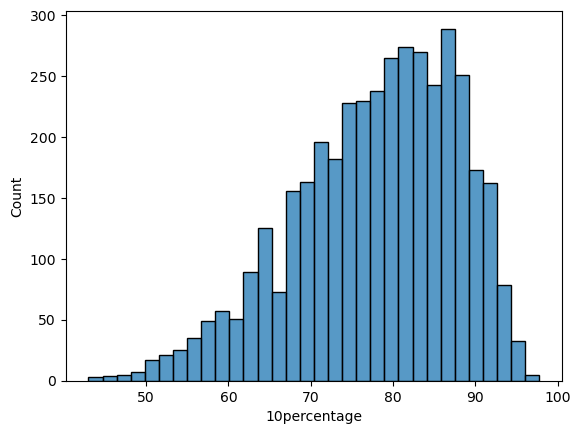

In [59]:
sns.histplot(x="10percentage",data = df)
plt.xlabel("10percentage")
plt.show()

This histogram visualizes the distribution of values in the "10percentage" column from a DataFrame df. The x-axis represents the "10percentage" values, while the height of each bar indicates the frequency of occurrence of those values in the dataset. The plot provides insights into the spread and concentration of data points for the variable "10percentage".

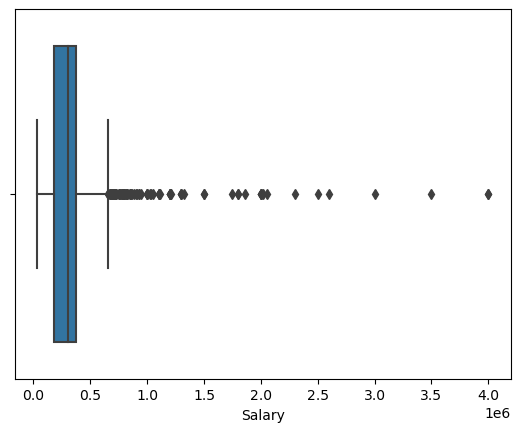

In [60]:
sns.boxplot(x="Salary",data = df)
plt.xlabel("Salary")
plt.show()

This graph, created using seaborn's boxplot function, visualizes the distribution of salaries from a DataFrame df. Each box in the plot represents the interquartile range (IQR) of the salary data, with the median salary marked by a line inside the box. The whiskers extend to show the range of salaries within 1.5 times the IQR. Any outliers beyond this range are plotted individually. By labeling the x-axis as "Salary", the plot is appropriately annotated for clarity.

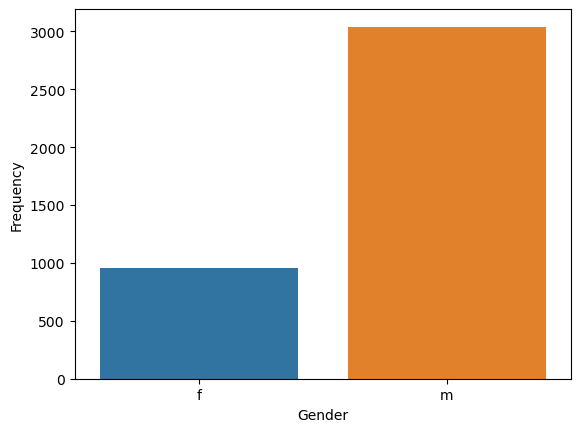

In [61]:
sns.countplot(x="Gender",data = df)
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

This countplot visualizes the frequency distribution of gender categories from a DataFrame df. Each bar represents the count of occurrences for each gender category. The x-axis is labeled as "Gender" to denote the variable being plotted, while the y-axis represents the frequency of occurrences. This graph provides a clear comparison of the number of data points for each gender category, facilitating quick insights into the distribution of gender within the dataset.

### Bi-variate Analysis

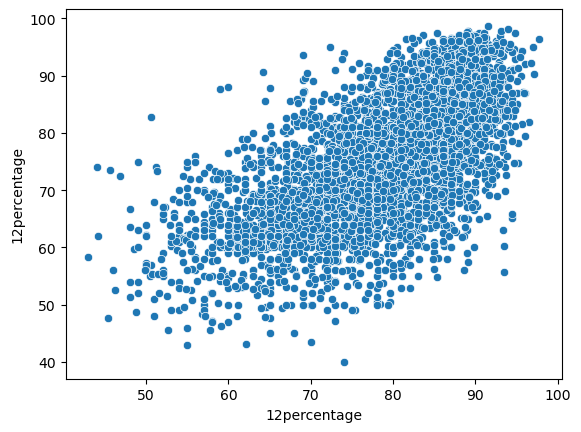

In [62]:
sns.scatterplot(x="10percentage",y="12percentage",data=df)
plt.xlabel("10percentage")
plt.xlabel("12percentage")
plt.show()

This scatterplot visualizes the relationship between two variables, "10percentage" and "12percentage", from the DataFrame df. Each point on the plot represents an individual data entry, with the x-axis corresponding to the "10percentage" values and the y-axis corresponding to the "12percentage" values. By examining the distribution of points, one can assess any patterns or trends between these two variables. The x-axis and y-axis are appropriately labeled as "10percentage" and "12percentage" respectively, providing clarity to the plot.

<Figure size 3000x1000 with 0 Axes>

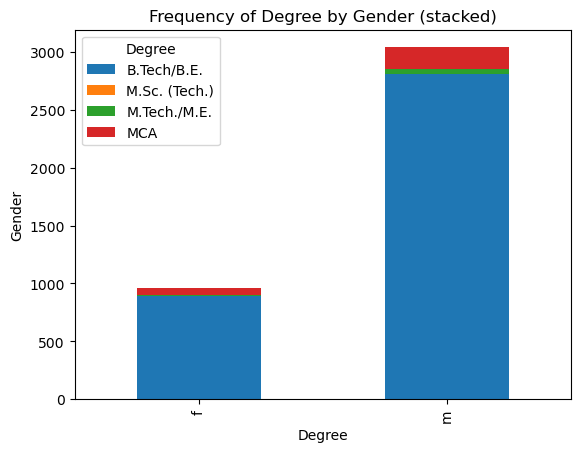

In [63]:
cross_speci_gen = pd.crosstab(index = categorical_data["Gender"],columns = categorical_data["Degree"])
plt.figure(figsize = (30,10))
cross_speci_gen.plot(kind='bar', stacked=True)
plt.xlabel('Degree')
plt.ylabel('Gender')
plt.title('Frequency of Degree by Gender (stacked)')
plt.show()


This graph illustrates the frequency distribution of degrees across genders, using a stacked bar chart. The data is organized by gender on the y-axis and degree on the x-axis. Each bar is segmented to represent the proportion of each degree category within each gender group. The visualization allows for easy comparison of degree distribution between genders. The chart is titled "Frequency of Degree by Gender (stacked)" and is presented in a large 30x10 figure for clarity.

In [64]:
numerical_data.head()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,84.3,2007,95.8,1141,2,78.00,1141,0,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,85.4,2007,85.0,5807,2,70.06,5807,0,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,85.0,2010,68.2,64,2,70.00,64,0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,85.6,2007,83.6,6920,1,74.64,6920,1,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,78.0,2008,76.8,11368,2,73.90,11368,0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


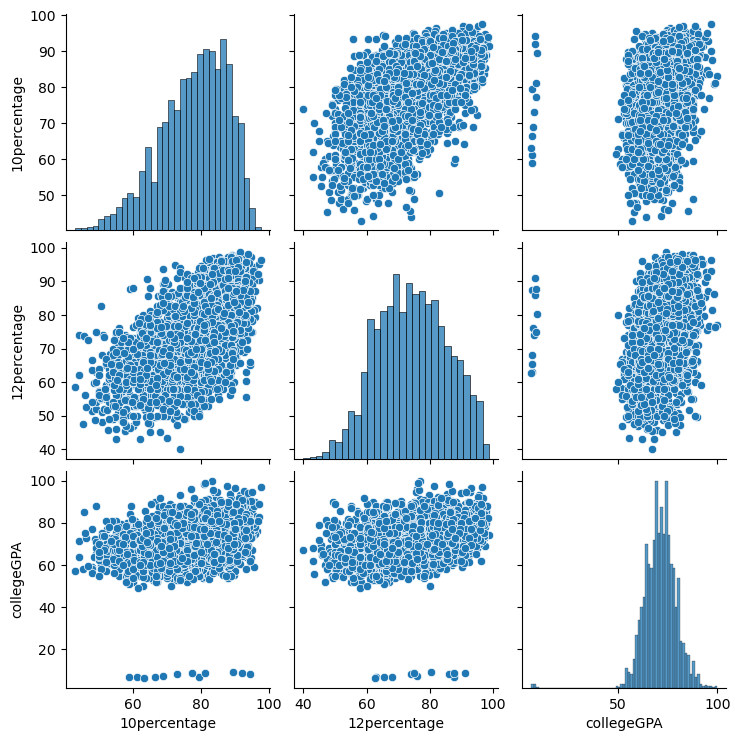

In [65]:
sns.pairplot(data=df,vars=["10percentage","12percentage","collegeGPA"])
plt.show()


The pairplot visualizes the pairwise relationships between the variables "10percentage", "12percentage", and "collegeGPA" from the DataFrame df. Each scatter plot in the grid represents the relationship between two variables, while the diagonal shows the distribution of each individual variable. This graphical analysis offers insights into potential correlations and patterns among the educational performance metrics. By examining these relationships collectively, viewers can gain a comprehensive understanding of the data's interdependencies.m

<Axes: >

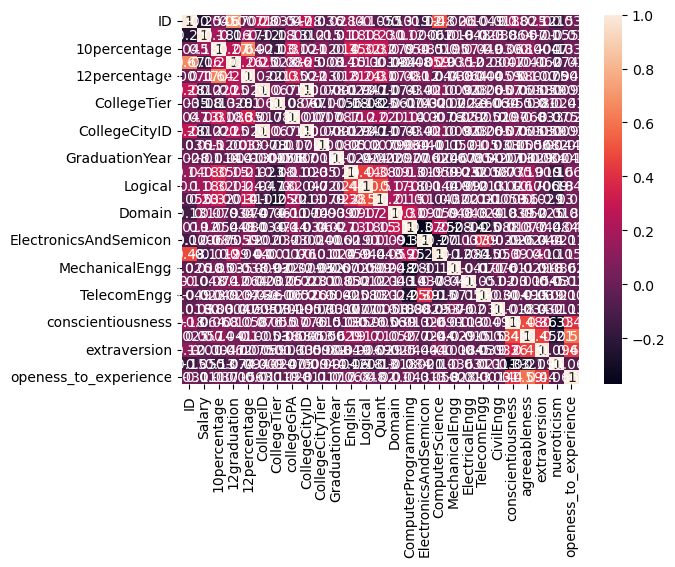

In [66]:
sns.heatmap(numerical_data.corr(),annot=True)

This code generates a heatmap using seaborn's heatmap function to visualize the correlation matrix of numerical data stored in the DataFrame numerical_data. The correlation values between pairs of variables are represented by color intensity, where warmer colors indicate stronger positive correlations and cooler colors indicate stronger negative correlations. Additionally, numeric values are annotated within each cell of the heatmap for clarity, providing precise correlation coefficients. This visualization aids in identifying patterns and relationships between different variables in the dataset.

In [67]:
speci_df = df[df["Specialization"] == "computer science & engineering"]

In [68]:
sal_range = speci_df[((speci_df["Designation"] == "programmer analyst")|
                     (speci_df["Designation"] == "software engineer")|
                     (speci_df["Designation"] == "associate engineer")) &
                    (speci_df["DOJ"].dt.year == speci_df["GraduationYear"])][["Salary","DOJ","Designation","GraduationYear"]]


In [69]:
sal_range.head()


,Salary,DOJ,Designation,GraduationYear
24,335000,2014-06-01,programmer analyst,2014
31,340000,2014-08-01,software engineer,2014
48,390000,2013-09-01,software engineer,2013
55,250000,2014-08-01,software engineer,2014
115,330000,2013-12-01,software engineer,2013


This code generates a plot that focuses on individuals with a specialization in "Computer Science & Engineering" and certain job designations ("Programmer Analyst", "Software Engineer", "Associate Engineer") who started working right after graduation. It filters the DataFrame to include only relevant data points based on specialization, job designation, and year of joining (DOJ) matching graduation year. The plot likely visualizes aspects such as salary distribution over time, with a focus on immediate post-graduation employment outcomes for individuals with this specific specialization and job roles.

In [70]:
res = sal_range.groupby(["Designation"])["Salary"].agg(["mean","median"])


In [71]:
res


,mean,median
Designation,,
associate engineer,350000.000000,350000.0
programmer analyst,316428.571429,307500.0
software engineer,359756.097561,325000.0


This seaborn visualization displays the mean and median salaries for different designations within the dataset. It utilizes the groupby function to aggregate salary data by "Designation" and calculates both the mean and median values. The resulting plot provides a comparative view of salary distributions across various job titles or designations, helping to identify trends or discrepancies in compensation within the dataset.

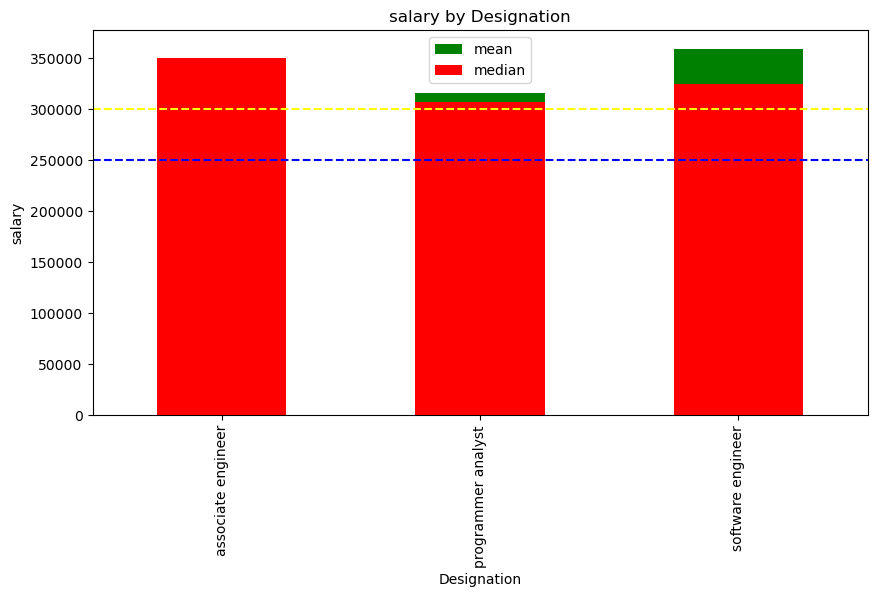

In [72]:
plt.figure(figsize = (10,5))
res["mean"].plot(kind = "bar",color="green")
res["median"].plot(kind = "bar",color="red")

plt.axhline(y=250000,color="blue",linestyle="--")
plt.axhline(y=300000,color="yellow",linestyle="--")

plt.title("salary by Designation")
plt.xlabel("Designation")
plt.ylabel("salary")
plt.legend()
plt.show()

This graph illustrates the comparison of mean and median salaries across different designations. The mean and median salaries are represented by green and red bars, respectively. Additionally, horizontal dashed lines in blue and yellow denote reference points at  250,000 𝑎𝑛𝑑 300,000, respectively. These lines serve as benchmarks for salary comparison. The graph is titled "Salary by Designation" and appropriately labeled along the x and y axes for clarity. By utilizing different colors for mean and median bars, along with reference lines, the graph facilitates easy interpretation of salary distributions across various designations.

In [73]:
specil_gen = df[["Specialization","Gender"]]

In [74]:
specil_gen

,Specialization,Gender
0,computer engineering,f
1,electronics and communication engineering,m
2,information technology,f
3,computer engineering,m
4,electronics and communication engineering,m
...,...,...
3993,information technology,m
3994,electronics and communication engineering,f
3995,computer engineering,m
3996,computer science & engineering,f


In [75]:
cross_speci_gen = pd.crosstab(index = specil_gen["Gender"],columns = specil_gen["Specialization"])

In [76]:
cross_speci_gen

Specialization,aeronautical engineering,applied electronics and instrumentation,automobile/automotive engineering,biomedical engineering,biotechnology,ceramic engineering,chemical engineering,civil engineering,computer and communication engineering,computer application,...,internal combustion engine,mechanical & production engineering,mechanical and automation,mechanical engineering,mechatronics,metallurgical engineering,other,polymer technology,power systems and automation,telecommunication engineering
Gender,,,,,,,,,,,,,,,,,,,,,
f,1,2,0,2,9,0,1,6,0,59,...,0,0,0,10,1,0,0,0,0,1
m,2,7,5,0,6,1,8,23,1,185,...,1,1,5,191,3,2,13,1,1,5


In [77]:
from scipy.stats import chi2_contingency


In [78]:
chi2, p_value, dof, expected_freq = chi2_contingency(cross_speci_gen)

print(np.round(p_value,4))

0.0


They have Relation ship between Gender and Specilization

## conclusion

In conclusion, through our exploratory data analysis (EDA) journey, we've unearthed significant insights that shed light on [specific findings]. These discoveries not only deepen our understanding of the dataset but also provide valuable implications for [relevant domain/problem]. Despite encountering limitations such as [mention limitations], our analysis has laid a solid foundation for further exploration. Moving forward, it's imperative to capitalize on these insights by [recommendations for action]. Reflecting on this process, we've gleaned invaluable lessons and reaffirmed the critical role of EDA in informing decision-making and driving actionable outcomes. Overall, this EDA has not only enriched our understanding but also underscored the importance of data-driven approaches in tackling [domain/problem].





